# Instructions 

<div><p>In the previous three missions, we focused on exploratory data visualization and learned the following:</p>
<ul>
<li>How to visualize time series data with line plots.</li>
<li>How to visualize correlations with scatter plots.</li>
<li>How to visualize frequency distributions with bar plots and histograms.</li>
</ul>
<p>In this mission, we'll continue learning about exploratory data visualization:</p>
<ul>
<li>How to speed up our exploratory data visualization workflow using Pandas.</li>
<li>How to better compare graphs using grid charts.</li>
</ul>
<p>We'll work with a data set about the urban traffic in São Paulo, the most populous city in Brazil. When it comes to traffic congestion, São Paulo is one of the most congested cities in the world.</p>
<p>Traffic jams can be as long as 100 km, and it can take people more than two hours to get to work. The city even has an air-taxi service for those who can afford it.</p>
<p></p><center>
<img src="https://s3.amazonaws.com/dq-content/523/m4_1.png" alt="img">
</center><p></p>
<p>Traffic jams cause significant loss. Instead of working, people are stuck in traffic wasting fuel, which leads to more air pollution, ultimately impacting human health. According to the <a href="https://www.worldbank.org/en/news/feature/2014/05/01/changing-commuter-choices-helps-sao-paulo-reduce-traffic-congestion" target="_blank">World Bank</a>, São Paulo's traffic jams were estimated to cost <span>$</span>17.8 billion dollars in 2012.</p>
<p>We'll introduce our dataset on the next screen.</p></div>

# Traffic behavior dataset 

<div><p>Our dataset describes the urban traffic in the city São Paulo from December 14, 2009 to December 18, 2009 — from Monday to Friday. Below, we see the first five rows:</p>
<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Hour (Coded)</th>
<th>Immobilized bus</th>
<th>Broken Truck</th>
<th>Vehicle excess</th>
<th>Accident victim</th>
<th>Running over</th>
<th>Fire vehicles</th>
<th>Occurrence involving freight</th>
<th>Incident involving dangerous freight</th>
<th>Lack of electricity</th>
<th>Fire</th>
<th>Point of flooding</th>
<th>Manifestations</th>
<th>Defect in the network of trolleybuses</th>
<th>Tree on the road</th>
<th>Semaphore off</th>
<th>Intermittent Semaphore</th>
<th>Slowness in traffic (%)</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>4,1</td>
</tr>
<tr>
<th>1</th>
<td>2</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>6,6</td>
</tr>
<tr>
<th>2</th>
<td>3</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>8,7</td>
</tr>
<tr>
<th>3</th>
<td>4</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>9,2</td>
</tr>
<tr>
<th>4</th>
<td>5</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>11,1</td>
</tr>
</tbody>
</table>
<p>Each row describes the following:</p>
<ul>
<li>The time of registering the data: the <code>Hour (Coded)</code> column.</li>
<li>The number of incidents that happened in São Paulo at the time of registering the data: <code>Immobilized bus</code>, <code>Broken Truck</code>, <code>Vehicle excess</code>, <code>Fire vehicles</code>, etc.</li>
<li>The traffic slowness at the time of registering the data: <code>Slowness in traffic (%)</code>.</li>
</ul>
<p>The data was registered from 7:00 to 20:00 every 30 minutes. The <code>Hour (Coded)</code> column has values from <code>1</code> to <code>27</code>:</p>
<ul>
<li><code>1</code> corresponds to 7:00.</li>
<li><code>2</code> corresponds to 7:30.</li>
<li><code>3</code> corresponds to 8:00.</li>
<li>...</li>
<li><code>26</code> corresponds to 19:30.</li>
<li><code>27</code> corresponds to 20:00.</li>
</ul>
<p>Researchers <a href="https://www.researchgate.net/profile/Ricardo_Pinto_Ferreira" target="_blank">Ricardo Pinto Ferreira</a>, <a href="https://www.researchgate.net/profile/Andrea_Martiniano" target="_blank">Andréa Martiniano</a>, and <a href="https://www.researchgate.net/profile/Renato_Sassi" target="_blank">Renato Jose Sassi</a> collected the dataset. You can download it from the <a href="https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil" target="_blank">UCI Machine Learning Repository</a>.</p>
<p>Now, let's read in the dataset. On the next screen, we're going to start the exploratory data visualization process.</p></div>

### Instructions 

<ol>
<li>Import the <code>pandas</code> module as <code>pd</code>.</li>
<li>Read in the <code>traffic_sao_paulo.csv</code> file using <code>pd.read_csv()</code>.<ul>
<li>The data points are separated by <code>;</code>, so you'll need to use <code>sep=';'</code> to read in the file properly.</li>
<li>Assign the result to a variable named <code>traffic</code>.</li>
</ul>
</li>
<li>Perform a quick examination of the dataset.<ul>
<li>Inspect the first and the last five rows.</li>
<li>Use <code>DataFrame.info()</code> to print summary information about the dataset. Do you see any missing values? Are all data types numerical?</li>
</ul>
</li>
</ol>

In [1]:
import pandas as pd 

traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')
print(traffic.head(5))
print(traffic.tail(5))
traffic.info()

   Hour (Coded)  Immobilized bus  Broken Truck  Vehicle excess  \
0             1                0             0               0   
1             2                0             0               0   
2             3                0             0               0   
3             4                0             0               0   
4             5                0             0               0   

   Accident victim  Running over  Fire vehicles  Occurrence involving freight  \
0                0             0              0                             0   
1                0             0              0                             0   
2                0             0              0                             0   
3                0             0              0                             0   
4                0             0              0                             0   

   Incident involving dangerous freight  Lack of electricity  Fire  \
0                                     0       

# Slowness in traffic 

<div><p>On the previous screen, we read in our dataset about urban traffic in São Paulo. Let's now start exploring the data.</p>
<p>In real situations, we usually have a goal when we explore data. Let's say our goal here is to determine the factors that cause the traffic slowness in São Paulo to worsen.</p>
<p>Notice that we're not asking what's <em>causing</em> the traffic congestion. The answer to this is that there are just too many cars on the road. We're asking what factors worsen the situation.</p>
<p>Let's begin by exploring the <code>Slowness in traffic (%)</code> column. The data type of this column is <code>object</code>, so we converted it to a <code>float</code> (you can see the code we used in the code editor).</p>
<p>Let's use the <code>DataFrame.describe()</code> method to see some of its characteristics:</p>
</div>

```
traffic['Slowness in traffic (%)'].describe()
```
```
count    135.000000
mean      10.051852
std        4.363243
min        3.400000
25%        7.400000
50%        9.000000
75%       11.850000
max       23.400000
Name: Slowness in traffic (%), dtype: float64
```

<div>
<p>The traffic slowness ranges from 3.4% to 23.4%, with an average of 10.1%. If we order all the values of <code>Slowness in traffic (%)</code> column in ascending order, we see that 25% of the values are under 7.4%, 50% are under 9.0%, and 75% are under 11.9%.</p>
<p>To get a better sense of the distribution of the values, we can plot a histogram. Let's do that in the following exercise.</p></div>

### Instructions 

<ol>
<li>Import <code>matplotlib.pyplot</code>, and plot a histogram for the <code>Slowness in traffic (%)</code> column — run your code without submitting the answer.</li>
<li>Based on the histogram, evaluate the truth value of the sentences below.<ul>
<li>The distribution of <code>Slowness in traffic (%)</code> is right skewed. Assign the Boolean <code>True</code> or <code>False</code> to <code>sentence_1</code>.</li>
<li>Most of the values pile up on the left side of the histogram. Assign <code>True</code> or <code>False</code> to <code>sentence_2</code>.</li>
<li>Most of the values are over 15.0%. Assign <code>True</code> or <code>False</code> to <code>sentence_3</code>.</li>
</ul>
</li>
</ol>

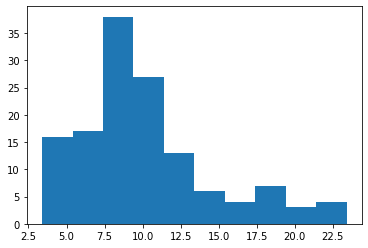

In [2]:
import matplotlib.pyplot as plt

traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

plt.hist(traffic['Slowness in traffic (%)'])
plt.show()

sentence_1 = True
sentence_2 = True
sentence_3 = False

# Pandas visualization methods 

<div><p>On the previous screen, we started to explore the dataset and plotted a histogram for the <code>'Slowness in traffic (%)'</code> column.</p>
</div>

```
import matplotlib.pyplot as plt
plt.hist(traffic['Slowness in traffic (%)'])
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen4_1.png" alt="img"></p>
<p>A quicker way to generate the same histogram is to use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html" target="_blank"><code>Series.plot.hist()</code> method</a>:</p>
</div>

```
traffic['Slowness in traffic (%)'].plot.hist()
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen4_2.png" alt="img"></p>
<p>Behind the curtains, Pandas uses Matplotlib to generate the graphs. For our graph above, Pandas used <code>plt.hist()</code> to generate the histogram.</p>
<p>Since Pandas uses Matplotlib code, we can call <code>plt.show()</code> once we're ready to display the graph. This also means we can use Matplotlib code to customize the graphs. Below, we first generate the histogram using <code>Series.plot.hist()</code>, and then we add an x-label using <code>plt.xlabel()</code>.</p>
</div>

```
traffic['Slowness in traffic (%)'].plot.hist()
plt.xlabel('Slowness in traffic (%)')
plt.show()
# The y-label "Frequency" was generated by default
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen4_3.png" alt="img"></p>
<p>The Pandas library has other useful visualization methods as well:</p>
<ul>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html" target="_blank"><code>Series.plot.bar()</code></a>: generates a vertical bar plot.</li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.barh.html" target="_blank"><code>Series.plot.barh()</code></a>: generates a horizontal bar plot.</li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.line.html" target="_blank"><code>Series.plot.line()</code></a>: generates a line plot.</li>
</ul>
<p>You might be wondering about creating a scatter plot. We'll talk about this later — until then, let's do a little practice.</p></div>

### Instructions 

<ol>
<li>Use the <code>Series.plot.hist()</code> method to generate a histogram for the <code>Slowness in traffic (%)</code> column.</li>
<li>Add the title <code>Distribution of Slowness in traffic (%)</code> (the answer checking is case-sensitive).</li>
<li>Add the x-label <code>Slowness in traffic (%)</code>.</li>
<li>Display the plot using <code>plt.show()</code>.</li>
</ol>

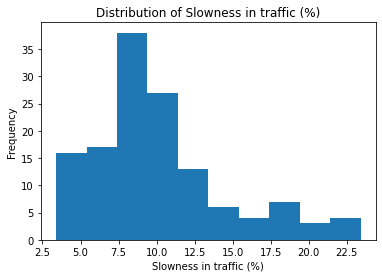

In [3]:
traffic['Slowness in traffic (%)'].plot.hist()
plt.title('Distribution of Slowness in traffic (%)')
plt.xlabel('Slowness in traffic (%)')
plt.show()

# Frequency of incidents 

<div><p>So far, we've examined the distribution of the <code>Slowness in traffic (%)</code> column. Recall that our goal here is to determine the factors that worsen the traffic slowness in São Paulo.</p>
<p>With the exception of the <code>Hour (Coded)</code> and <code>Slowness in traffic (%)</code> columns, all the columns describe incident types related to traffic slowness: immobilized buses, broken trucks, accidents with victims, fire, manifestations, etc.</p>
<p>Each one of these columns records the number of incidents reported at the time of registering the data. If we sum all the values in a column, we can get the total number of incidents that happened between December 14, 2009 and December 18, 2009 — from Monday to Friday.</p>
<p>For instance, we see there were 118 broken truck incidents:</p>
</div>

```
traffic['Broken Truck'].sum()
```
```
118
```

<div>
<p>Let's calculate the sums for all the incident columns so we can compare them (we start with isolating the incident columns by dropping the columns <code>'Hour (Coded)'</code> and <code>'Slowness in traffic (%)'</code>).</p>
</div>

```
incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'],
                        axis=1)
incidents.sum()
```
```
Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64
```

<div>
<p>It's not easy to compare all these numbers just by eyeballing the table that <code>incidents.sum()</code> returned. It's better if we use a bar plot to visualize the values.</p>
<p>Before we generate the bar plot, let's make the observation that <code>incidents.sum()</code> returns a Pandas <code>Series</code>:</p>
</div>

```
type(incidents.sum())
```
```
pandas.core.series.Series
```

<div>
<p>This means that we can use the <code>Series.plot.bar()</code> method we mentioned on the previous screen:</p>
</div>

```
incidents.sum().plot.bar()
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen5_1.png" alt="img"></p>
<p>One of the first things we notice is that the x-tick labels are very hard to read — we need to tilt our head to the left to be able to read anything.</p>
<p>Let's use the next exercise to turn this graph into a horizontal bar plot.</p></div>

### Instructions 

<ol>
<li>Generate a horizontal bar plot for the <code>incidents.sum()</code> table. Run your code without submitting the answer.</li>
<li>Based on the resulting bar plot, evaluate the truth value of the following sentences:<ul>
<li>Broken trucks are the most frequent cause of slow traffic. Assign the Boolean <code>True</code> or <code>False</code> to <code>sentence_1</code>.</li>
<li>Lack of electricity and flooding are less frequent than broken trucks. Assign <code>True</code> or <code>False</code> to <code>sentence_2</code>.</li>
<li>The most frequent incident type is broken trucks. Assign <code>True</code> or <code>False</code> to <code>sentence_3</code>.</li>
</ul>
</li>
</ol>

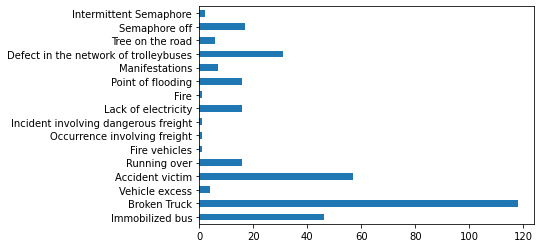

In [4]:
incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'],
                        axis=1)
incidents.sum().plot.barh()
plt.show()

sentence_1 = False
sentence_2 = True
sentence_3 = True

# Correlation with traffic slowness

<div><p>On the previous screen, we examined the frequency of incidents by generating a bar plot — recall that we're interested in identifying factors that worsen the traffic slowness.</p>
<p>To get an accurate picture about each incident type and its relationship with traffic slowness, we can look up a few correlation values. The table below shows the correlation between <code>Slowness in traffic (%)</code> and every other column:</p>
</div>

```
traffic.corr()['Slowness in traffic (%)']
```
```
Hour (Coded)                             0.729962
Immobilized bus                          0.101143
Broken Truck                             0.131998
Vehicle excess                          -0.045297
Accident victim                          0.121730
Running over                            -0.001133
Fire vehicles                            0.134103
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Lack of electricity                      0.436569
Fire                                    -0.046737
Point of flooding                        0.420016
Manifestations                           0.066377
Defect in the network of trolleybuses   -0.147035
Tree on the road                        -0.098489
Semaphore off                            0.347242
Intermittent Semaphore                  -0.119942
Slowness in traffic (%)                  1.000000
Name: Slowness in traffic (%), dtype: float64
```

<div>
<p>Leaving out the <code>Hour (Coded)</code> column (which doesn't describe an incident type), <code>Slowness in traffic (%)</code> correlates most strongly with the following:</p>
<ul>
<li><code>Lack of electricity</code>: +0.44</li>
<li><code>Point of flooding</code>: +0.42</li>
<li><code>Semaphore off</code>: +0.34</li>
</ul>
<p>To visualize the correlation between any two columns, we can use a scatter plot. Let's start with generating a scatter plot for <code>Slowness in traffic (%)</code> and <code>Lack of electricity</code>.</p>
</div>

```
plt.scatter(traffic['Slowness in traffic (%)'],
            traffic['Lack of electricity'])
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen6_1.png" alt="img"></p>
<p>Alternatively, we can use Pandas to generate the scatter plot above. Specifically, we can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html" target="_blank"><code>DataFrame.plot.scatter()</code> method</a>:</p>
</div>

```
traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Lack of electricity')
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen6_2.png" alt="img"></p>
<p>The positive correlation is not very obvious on the scatter plot — although we see that when <code>Lack of electricity</code> increases to <code>2</code>, <code>3</code> or <code>4</code>, the traffic slowness percentage tends to increase as well.</p>
<p>Let's now generate the other two scatter plots.</p></div>

### Instructions 

<p>Using the <code>DataFrame.plot.scatter()</code> method:</p>
<ol>
<li>Generate a scatter plot with <code>Slowness in traffic (%)</code> on the x-axis and <code>Point of flooding</code> on the y-axis. Close and display the plot using <code>plt.show()</code>.</li>
<li>Generate a scatter plot with <code>Slowness in traffic (%)</code> on the x-axis and <code>Semaphore off</code> on the y-axis.</li>
</ol>

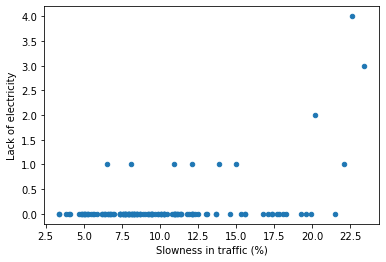

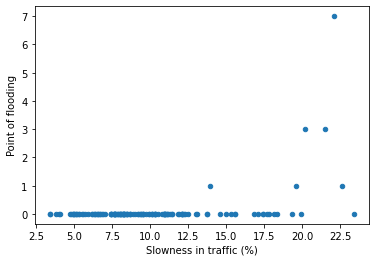

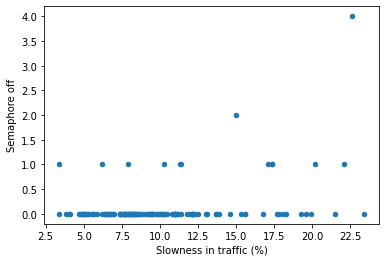

In [5]:
traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Lack of electricity')
plt.show()

traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Point of flooding')
plt.show()

traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Semaphore off')
plt.show()

# Traffic slowness over 20%

<div><p>On the previous screen, we looked up a few correlation values and generated three scatter plots. We identified lack of electricity, flooding, and nonfunctional semaphores as potential factors worsening the traffic.</p>
<p>To look for more evidence, we're going to isolate all the rows where traffic slowness is 20% or more. Then, we're going to calculate and visualize the incident frequency.</p>
<p>Let's do this together in the next exercise.</p></div>

### Instructions 

<p>Check the hint for the following exercises if you get stuck.</p>
<ol>
<li>Isolate all the rows where traffic slowness is 20% or more. Assign the new <code>DataFrame</code> to a variable named <code>slowness_20_or_more</code>.</li>
<li>Drop the <code>Slowness in traffic (%)</code> and <code>Hour (Coded)</code> columns from <code>slowness_20_or_more</code>.</li>
<li>Calculate the event frequencies using the <code>DataFrame.sum()</code> method on <code>slowness_20_or_more</code>. Assign the resulting <code>Series</code> to <code>incident_frequencies</code>.</li>
<li>Use <code>incident_frequencies</code> to plot a horizontal bar plot — use a Pandas method.</li>
<li>Examine the plot — what are some high-frequency incidents when traffic slowness is 20% or more?</li>
</ol>

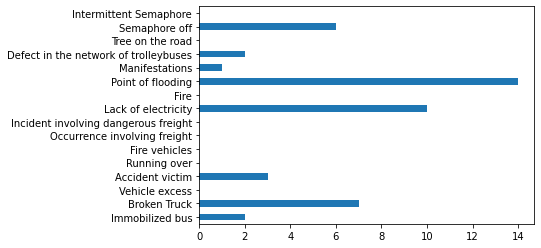

In [6]:
slowness_20_or_more = traffic[traffic['Slowness in traffic (%)'] >= 20]
slowness_20_or_more = slowness_20_or_more.drop(['Slowness in traffic (%)', 'Hour (Coded)'],
                         axis=1)
incident_frequencies = slowness_20_or_more.sum()
incident_frequencies.plot.barh()
plt.show()

# How traffic slowness changes 

<div><p>On the previous screen, we isolated the rows where traffic slowness is higher than 20%.</p>
<p>One conclusion is that lack of electricity and flooding are probably two factors that are causing significant traffic problems. Nonfunctional semaphores also affect traffic, but they are probably a result of lack of electricity.</p>
<p>If we had to communicate our results to São Paulo's administration, we could report that lack of electricity and flooding cause significant traffic problems. This information can help in choosing which incident type to prioritize solving.</p>
<p>The last thing we're going to look at in this mission is how traffic slowness changes over the 7:00 – 20:00 time interval.</p>
<p>First, we're going to isolate the data for each day — from Monday to Friday.</p>
</div>

```
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic
```

<div>
<p>The <code>traffic_per_day</code> variable is a Python dictionary. It contains five keys: <code>'Monday'</code>, <code>'Tuesday'</code>, <code>'Wednesday'</code>, <code>'Thursday'</code>, and <code>'Friday'</code>. For each key, we have a <code>DataFrame</code> containing only the data for that specific day. For instance, <code>traffic_per_day['Monday']</code> has only the data for Monday:</p>
</div>

```
traffic_per_day['Monday'].head(3)
```

<div>
<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Hour (Coded)</th>
<th>Immobilized bus</th>
<th>Broken Truck</th>
<th>Vehicle excess</th>
<th>Accident victim</th>
<th>Running over</th>
<th>Fire vehicles</th>
<th>Occurrence involving freight</th>
<th>Incident involving dangerous freight</th>
<th>Lack of electricity</th>
<th>Fire</th>
<th>Point of flooding</th>
<th>Manifestations</th>
<th>Defect in the network of trolleybuses</th>
<th>Tree on the road</th>
<th>Semaphore off</th>
<th>Intermittent Semaphore</th>
<th>Slowness in traffic (%)</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>4.1</td>
</tr>
<tr>
<th>1</th>
<td>2</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>6.6</td>
</tr>
<tr>
<th>2</th>
<td>3</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>8.7</td>
</tr>
</tbody>
</table>
</div>

```
traffic_per_day['Monday'].tail(3)
```

<div>
<table class="dataframe">
<thead>
<tr>
<th></th>
<th>Hour (Coded)</th>
<th>Immobilized bus</th>
<th>Broken Truck</th>
<th>Vehicle excess</th>
<th>Accident victim</th>
<th>Running over</th>
<th>Fire vehicles</th>
<th>Occurrence involving freight</th>
<th>Incident involving dangerous freight</th>
<th>Lack of electricity</th>
<th>Fire</th>
<th>Point of flooding</th>
<th>Manifestations</th>
<th>Defect in the network of trolleybuses</th>
<th>Tree on the road</th>
<th>Semaphore off</th>
<th>Intermittent Semaphore</th>
<th>Slowness in traffic (%)</th>
</tr>
</thead>
<tbody>
<tr>
<th>24</th>
<td>25</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>11.8</td>
</tr>
<tr>
<th>25</th>
<td>26</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>2</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>11.4</td>
</tr>
<tr>
<th>26</th>
<td>27</td>
<td>1</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>7.4</td>
</tr>
</tbody>
</table>
<p>To visualize how the values of a column change over time, we can use a line plot. To generate a line plot out of a <code>DataFrame</code>, we can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html" target="_blank"><code>DataFrame.plot.line()</code> method</a>:</p>
</div>

```
traffic_per_day['Monday'].plot.line(x='Hour (Coded)',
                                    y='Slowness in traffic (%)')
plt.show()
```
<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen8_1.png" alt="img"></p>
<p>Now that we've isolated the data, let's generate a line plot for each day.</p></div>

### Instructions 

<ol>
<li>
<p>Create a separate line plot for each day by using a <code>for</code> loop. Iterate over the <code>days</code> list, and for each day, do the following:</p>
<ul>
<li>Plot a line plot using the <code>DataFrame.plot.line()</code> method — <code>Hour (Coded)</code> must be on the x-axis and <code>Slowness in traffic (%)</code> on the y-axis.</li>
<li>Add a title to the plot using the name of the day.</li>
<li>Use <code>plt.ylim([0, 25])</code> to make the range of the y-axis the same for all plots — this helps with comparison.</li>
<li>Close and display each plot with <code>plt.show()</code>.</li>
</ul>
</li>
<li>
<p>Inspect and compare the graphs — do you notice any recurring pattern in how traffic slowness changes during the day?</p>
</li>
</ol>




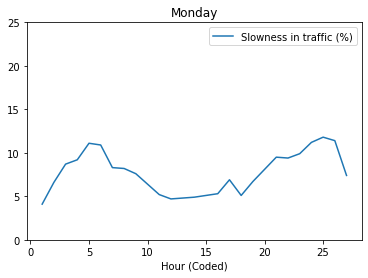

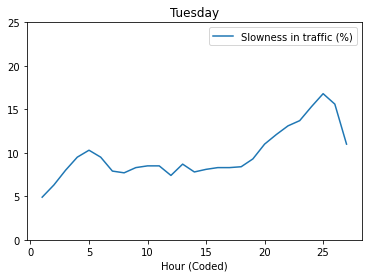

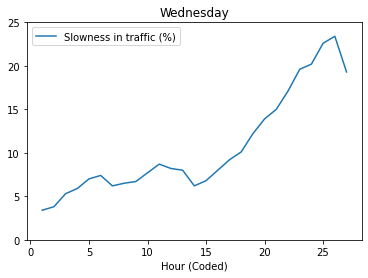

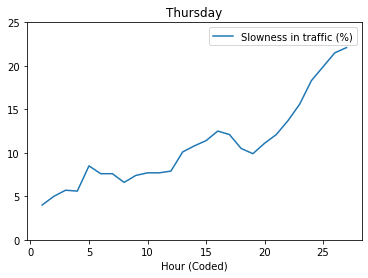

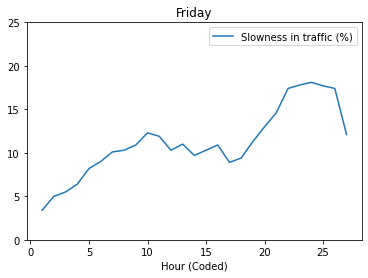

In [7]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic

for day in days:
    traffic_per_day[day].plot.line(x='Hour (Coded)', 
                                   y='Slowness in traffic (%)')
    plt.title(day)
    plt.ylim([0, 25])
    plt.show()

# Comparing graphs

<div><p>In the previous exercise, we plotted five line plots, one for each day from Monday to Friday. To better compare the graphs, we brought the y-axis to the same range for each plot — we used the code <code>plt.ylim([0, 25])</code>.</p>
<p>Remember we also plotted the graphs one below the other. This arrangement makes comparing graphs more difficult. To compare the Monday graph with the Friday graph, for instance, we need to scroll up and down repeatedly.</p>
<p>A better choice here is to put all five line plots on the same graph.</p>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen9_1.png" alt="img"></p>
<p>Looking at the graph, we see the slowest traffic was on Wednesday and Thursday nights between 17:00 and 20:00. This specific time interval also registered high slowness values on Tuesday and Friday (and Monday — more or less). This is most likely the time when people are returning home from work.</p>
<p>Let's generate this plot ourselves in the next exercise. However, we're going to use <code>plt.plot()</code> instead of the <code>DataFrame.plot.line()</code> method. That's because <code>DataFrame.plot.line()</code> plots separate graphs by default, which means we won't be able to put all the lines on the same graph.</p></div>

### Instructions 

<ol>
<li>
<p>Generate all the five line plots on a single graph. Use a <code>for</code> loop over the <code>days</code> list, and for each day, do the following:</p>
<ul>
<li>Plot a line plot using <code>plt.plot()</code>: <code>Hour (Coded)</code> must be on the x-axis and <code>Slowness in traffic (%)</code> on the y-axis.</li>
</ul>
</li>
<li>
<p>Add a legend to the graph.</p>
<ul>
<li>Outside the <code>for</code> loop, use <code>plt.legend()</code>.</li>
<li>Inside the <code>for</code> loop, use the <code>label</code> parameter inside <code>plt.plot()</code> — the label should be the day name.</li>
</ul>
</li>
</ol>

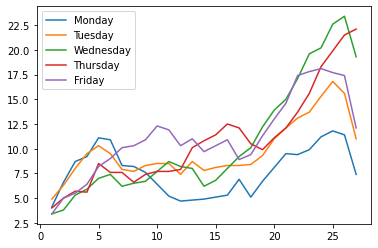

In [8]:
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'],
             label=day)
plt.legend()
plt.show()

# Grid charts

<div><p>On the previous screen, we concluded that it's easier to compare the line plots if they are all on the same graph.</p>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen9_1.png" alt="img"></p>
<p>However, there are portions on the graph where there are too many lines close to each other. This is making the graph harder to read. It's also hard to follow the line of a single day because it intersects with other lines.</p>
<p>The best approach in this case is to plot the five line plots both collectively and separately.</p>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen10_0.png" alt="img"></p>
<p>What we see above is a <strong>grid chart</strong> — also known as a <strong>small multiple</strong>. A grid chart is a collection of similar graphs that usually share the same x- and y-axis range. The main purpose of a grid chart is to ease comparison.</p>
<p>Matplotlib is flexible enough to make grid charts possible. In fact, we created the grid chart above in Matplotlib.</p>
<p>To create a grid chart, we start by creating the larger figure where we will plot all the graphs — we use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html" target="_blank"><code>plt.figure()</code> function</a>.</p>
</div>

```
plt.figure()
```
```
<Figure size 432x288 with 0 Axes>
<Figure size 432x288 with 0 Axes>
```

<div>
<p>The second step is to create the first plot. You can also call the plots on a grid chart <strong>subplots</strong> — with this in mind, let's use the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html" target="_blank"><code>plt.subplot()</code> function</a> to create our first plot:</p>
</div>

```
plt.figure()
plt.subplot()
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen10_1.png" alt="img"></p>
<p>Before moving on, we need to mention the table-like structure of a grid chart — it has rows and columns.The grid chart below, for instance, has three rows and two columns. Also, each plot is indexed by a number — the upper left plot has the index <code>1</code>, its neighboring plot on the right is indexed with <code>2</code>, and so on.</p>
<p></p><center><img src="https://s3.amazonaws.com/dq-content/523/grid_chart_row_col.svg" alt="img"></center><p></p>
<p>We can specify the number of rows and columns for our grid chart by using the <code>plt.subplot(nrows, ncols, index)</code> function. For instance, <code>plt.subplot(3, 2, 1)</code> means that we want to build the plot with index <code>1</code> on a grid chart that has <code>3</code> rows and <code>2</code> columns.</p>
</div>

```
plt.figure()
plt.subplot(3, 2, 1)
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen10_2.png" alt="img"></p>
<p>When we want to add another plot, we add another <code>plt.subplot()</code> function. Below, we add the sixth plot on the grid chart.</p>
</div>

```
plt.figure()
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 6) # index number 6
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen10_3.png" alt="img"></p>
<p>When we add a second plot, we need to keep the same rows and columns configuration. The only parameter we want to change is the index number. Below, we add the subplot with index <code>2</code>.</p>
</div>

```
plt.figure()
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 6)
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen10_4.png" alt="img"></p>
<p>As a sidenote, a quirk of <code>plt.subplot()</code> is that it only takes positional arguments. If we use keyword arguments, we'll get an error — <code>plt.subplot(nrows=3, ncols=2, index=1)</code> raises an error.</p>
<p>Let's create the other three plots in the next exercise and continue the discussion on the next screen.</p></div>

### Instructions 

<ol>
<li>Inside the code editor, we've already added three plots on the grid chart. Add the other three plots.</li>
</ol>

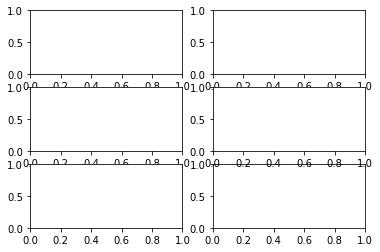

In [9]:
plt.figure()
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 6)
# Your code
plt.subplot(3, 2, 3)
plt.subplot(3, 2, 4)
plt.subplot(3, 2, 5)
plt.show()

<div><p>On the previous screen, we started working on our grid chart and plotted six empty plots.</p>
</div>

```
plt.figure()
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 3)
plt.subplot(3, 2, 4)
plt.subplot(3, 2, 5)
plt.subplot(3, 2, 6)
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen11_1.png" alt="img"></p>
<p>The plots are overlapping, and the grid chart as a whole looks a bit too packed. To fix this, we're going to increase the size of the entire figure by using <code>plt.figure(figsize=(width, height))</code>.</p>
</div>

```
plt.figure(figsize=(10, 12))
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 3)
plt.subplot(3, 2, 4)
plt.subplot(3, 2, 5)
plt.subplot(3, 2, 6)
plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen11_2.png" alt="img"></p>
<p>Now let's start to plot the line graphs that show how traffic slowness changes. Under each <code>plt.subplot()</code> function, we need to write the code that's going to generate the plot we want. Below, we generate our first plot.</p>
</div>

```
plt.figure(figsize=(10, 12))

# The first subplot
plt.subplot(3, 2, 1)
plt.plot(traffic_per_day['Monday']['Hour (Coded)'],
        traffic_per_day['Monday']['Slowness in traffic (%)'])

# The rest of the subplots
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 3)
plt.subplot(3, 2, 4)
plt.subplot(3, 2, 5)
plt.subplot(3, 2, 6)

# plt.show() at the end to display the entire grid chart
plt.plot()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen11_3.png" alt="img"></p>
<p>Matplotlib allows us to customize the subplots individually. All the Matplotlib code under a certain <code>plt.subplot()</code> function is targeted towards the particular subplot that function generates. A second <code>plt.subplot()</code> function generates a second subplot, and the matplolib code that follows targets the second subplot.</p>
<p>Below, we add a second line plot and different titles to the first three subplots.</p>
</div>

```
plt.figure(figsize=(10, 12))

# The first subplot
plt.subplot(3, 2, 1)
plt.plot(traffic_per_day['Monday']['Hour (Coded)'],
        traffic_per_day['Monday']['Slowness in traffic (%)'])
plt.title('Monday')

# The second subplot
plt.subplot(3, 2, 2)
plt.plot(traffic_per_day['Tuesday']['Hour (Coded)'],
        traffic_per_day['Tuesday']['Slowness in traffic (%)'])
plt.title('Tuesday')

# The third subplot
plt.subplot(3, 2, 3)
plt.title('Wednesday')

# The rest of the subplots
plt.subplot(3, 2, 4)
plt.subplot(3, 2, 5)
plt.subplot(3, 2, 6)

plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen11_4.png" alt="img"></p>
<p>When we need to use the <code>plt.subplot()</code> function multiple times, it's better to use a <code>for</code> loop. Below, for instance, we create all the six plots with significantly less code.</p>
</div>

```
plt.figure(figsize=(10,12))

for i in range(1, 7):
    plt.subplot(3, 2, i)

plt.show()
```

<div>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen11_5.png" alt="img"></p>
<p>Now let's plot the first five plots in the next exercise. We'll plot the sixth plot on the next screen.</p></div>

### Instructions 

<ol>
<li>Create a new figure with <code>figsize=(10,12)</code>.</li>
<li>Create the first five plots using a <code>for</code> loop. Iterate over both a range (use the <code>range()</code> function) and the <code>days</code> list. For each iteration, do the following:<ul>
<li>Add the proper index number inside <code>plt.subplot(nrows, ncols, index)</code>.</li>
<li>Generate a line plot for each day — <code>Hour (Coded)</code> must be on the x-axis and <code>Slowness in traffic (%)</code> on the y-axis.</li>
<li>Add the day name as a plot title.</li>
<li>Bring the plot to a 0-25 range on the y-axis.</li>
</ul>
</li>
</ol>

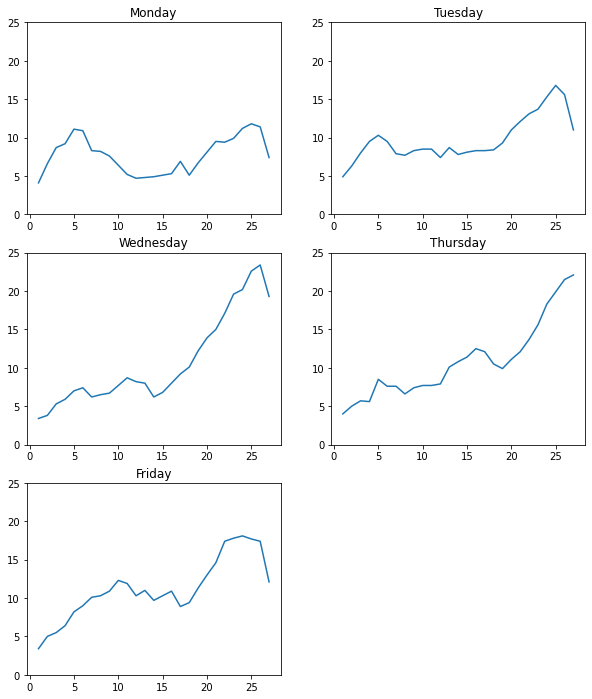

In [10]:
plt.figure(figsize=(10,12))
for i, day in enumerate(days):
    plt.subplot(3, 2, i+1)
    plt.plot(traffic_per_day[day]['Hour (Coded)'], 
             traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0, 25])
plt.show()

<div><p>In the previous exercise, we generated the first five plots on our grid chart. Recall, however, that we still need to add the line plot showing all the days on the same graph.</p>
<p><img src="https://s3.amazonaws.com/dq-content/523/m4_screen9_1.png" alt="img"></p>
<p>Below, we see once more the code we used to create the graph above:</p>
</div>

```
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'],
             label=day)

plt.legend()
plt.show()
```

<div>
<p>Let's complete our grid chart in the last exercise of this mission!</p></div>

### Instructions 

<ol>
<li>Add a new subplot with index number <code>6</code>.</li>
<li>Generate the line plot showing all the days on a single graph, and add a legend to the graph.</li>
<li>Bring the y-range to <code>[0, 25]</code>.</li>
</ol>

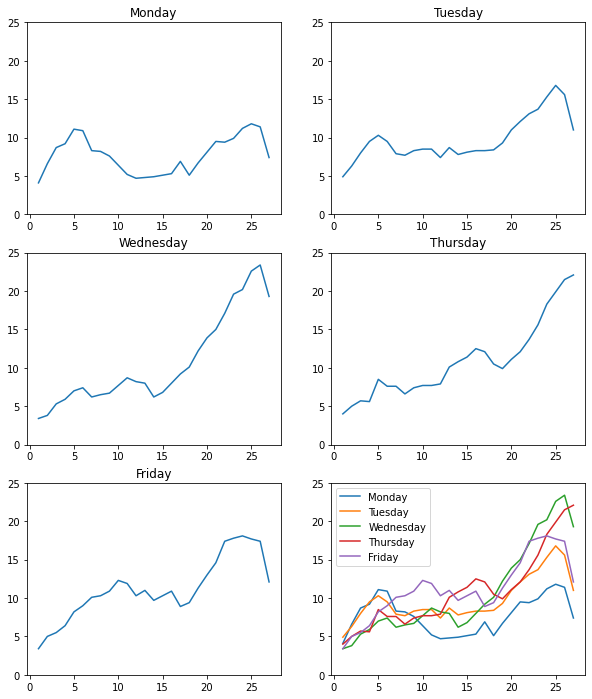

In [11]:
plt.figure(figsize=(10,12))

for i, day in zip(range(1,6), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
        traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0,25])

plt.subplot(3, 2, 6)
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'],
             label=day)
    plt.ylim([0, 25])

plt.legend()
plt.show()